In [86]:
%pylab inline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier

Populating the interactive namespace from numpy and matplotlib


In [87]:
data = np.loadtxt('ex2data2.txt',delimiter=',')
X = data[:,:-1]
y = data[:,-1].reshape((-1,1))
X_pos = X[y[:,0] == 1]
X_neg = X[y[:,0] == 0]

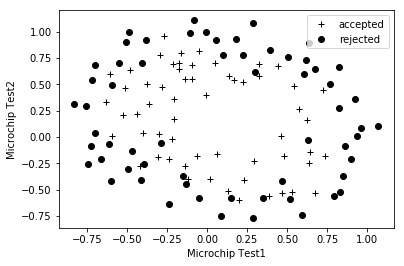

In [88]:
plt.plot(*X_pos.T,'k+',label='accepted')
plt.plot(*X_neg.T,'ko',label='rejected')
plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")
plt.legend(loc=1);

### Logistic Regression

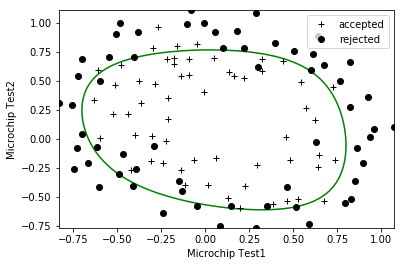

In [133]:
pipe = make_pipeline(PolynomialFeatures(degree=6,
                                        include_bias=False),
                     #StandardScaler(),
                     LogisticRegression(solver='newton-cg',
                         penalty='l2',
                         C=0.5,
                        max_iter=100))
pipe.fit(X,y.ravel())

u = np.linspace(X[:,0].min(),X[:,0].max(),100)
v = np.linspace(X[:,1].min(),X[:,1].max(),100)
U, V = np.meshgrid(u,v)
Z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        Z[i,j] = pipe.predict_proba([[u[i],v[j]]])[0,1]
            
plt.plot(*X_pos.T,'k+',label='accepted')
plt.plot(*X_neg.T,'ko',label='rejected')
plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")
plt.legend(loc=1)
plt.contour(U,V,Z,[0.5],colors=['green']);

### Stochastic Gradient Descent Classification

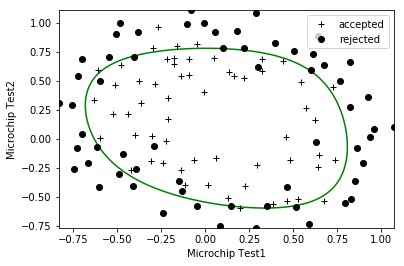

In [130]:
pipe = make_pipeline(PolynomialFeatures(degree=6),
                     #StandardScaler(),
                     SGDClassifier(loss='log',
                                   max_iter=1500,
                                   penalty='l2',
                                   alpha=0.01))
pipe.fit(X,y.ravel())

u = np.linspace(X[:,0].min(),X[:,0].max(),100)
v = np.linspace(X[:,1].min(),X[:,1].max(),100)
U, V = np.meshgrid(u,v)
Z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        Z[i,j] = pipe.predict_proba([[u[i],v[j]]])[0,1]
            
plt.plot(*X_pos.T,'k+',label='accepted')
plt.plot(*X_neg.T,'ko',label='rejected')
plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")
plt.legend(loc=1)
plt.contour(U,V,Z,[0.5],colors=['green']);